In [56]:
import pandas as pd
import numpy as np

In [57]:
column_names = ['user_id', 'item_id','rating','timestamp']

In [58]:
df = pd.read_csv('C:/Users/Akshay/Desktop/Udemy/Recommmendation System/u.data', sep = '\t', names = column_names)

In [59]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [60]:
movie_titles = pd.read_csv('C:/Users/Akshay/Desktop/Udemy/Recommmendation System/Movie_Id_Titles')

In [61]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [62]:
df = pd.merge(df, movie_titles, on = 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
#Grouping the movie titles by rating (mean):
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [65]:
#Grouping the movie titles by total number of ratings:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [66]:
#Creating a database of the above grouped data:

ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [67]:
#Adding the other column:
ratings['Number of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,Number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [68]:
ratings.head()

,rating,Number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


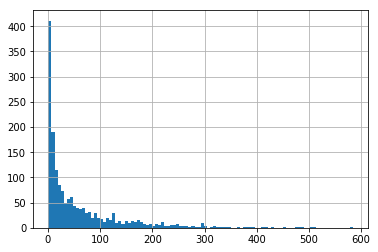

In [69]:
ratings['Number of ratings'].hist(bins = 100)

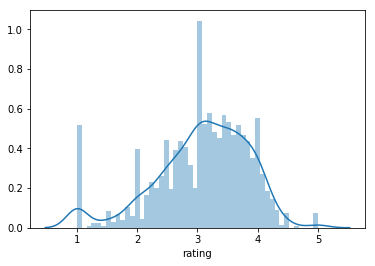

In [70]:
sns.distplot(ratings['rating'],bins=50)

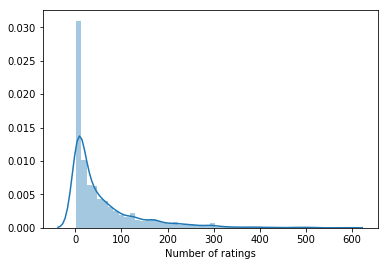

In [71]:
sns.distplot(ratings['Number of ratings'], bins = 50)

<Figure size 576x432 with 0 Axes>

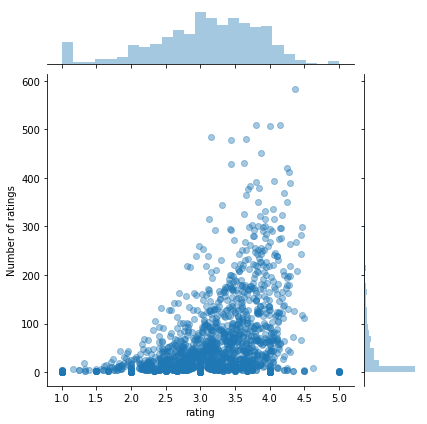

In [72]:
plt.figure(figsize = (8,6))
sns.jointplot(x='rating', y='Number of ratings', data = ratings, alpha = 0.4)

In [73]:
ratings.head()

,rating,Number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [74]:
moviemat = df.pivot_table(index ='user_id', columns = 'title', values = 'rating')

In [75]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
ratings.sort_values(by='Number of ratings', ascending=False).head()

,rating,Number of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [77]:
Starwars_user_ratings = moviemat['Star Wars (1977)']
LiarLiar_user_ratings = moviemat['Liar Liar (1997)']

In [78]:
Starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [79]:
LiarLiar_user_ratings.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

In [80]:
similar_to_Starwars = moviemat.corrwith(Starwars_user_ratings)
similar_to_LiarLiar = moviemat.corrwith(LiarLiar_user_ratings)

In [81]:
corr_Starwars = pd.DataFrame(similar_to_Starwars, columns = ['Correlation']).dropna()
corr_LiarLiar = pd.DataFrame(similar_to_LiarLiar, columns = ['Correlation']).dropna()

In [82]:
corr_Starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [83]:
corr_LiarLiar.head()

,Correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739


In [84]:
corr_Starwars.sort_values(by='Correlation', ascending = False).head()

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0


In [85]:
corr_Starwars = corr_Starwars.join(ratings.iloc[:,1])
corr_Starwars.head()

,Correlation,Number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [105]:
similar = corr_Starwars[corr_Starwars['Number of ratings']>100].sort_values('Correlation', ascending = False).head()
similar

,Correlation,Number of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [125]:
similar['Title'] = similar.index
similar

,Correlation,Number of ratings,Title
title,,,
Star Wars (1977),1.000000,584,Star Wars (1977)
"Empire Strikes Back, The (1980)",0.748353,368,"Empire Strikes Back, The (1980)"
Return of the Jedi (1983),0.672556,507,Return of the Jedi (1983)
Raiders of the Lost Ark (1981),0.536117,420,Raiders of the Lost Ark (1981)
Austin Powers: International Man of Mystery (1997),0.377433,130,Austin Powers: International Man of Mystery (1...


In [129]:
similar['Index'] = list(range(len(similar.index)))
similar

,Correlation,Number of ratings,Title,Index
title,,,,
Star Wars (1977),1.000000,584,Star Wars (1977),0
"Empire Strikes Back, The (1980)",0.748353,368,"Empire Strikes Back, The (1980)",1
Return of the Jedi (1983),0.672556,507,Return of the Jedi (1983),2
Raiders of the Lost Ark (1981),0.536117,420,Raiders of the Lost Ark (1981),3
Austin Powers: International Man of Mystery (1997),0.377433,130,Austin Powers: International Man of Mystery (1...,4


In [131]:
similar.set_index('Index')

,Correlation,Number of ratings,Title
Index,,,
0,1.000000,584,Star Wars (1977)
1,0.748353,368,"Empire Strikes Back, The (1980)"
2,0.672556,507,Return of the Jedi (1983)
3,0.536117,420,Raiders of the Lost Ark (1981)
4,0.377433,130,Austin Powers: International Man of Mystery (1...


(0, 1)

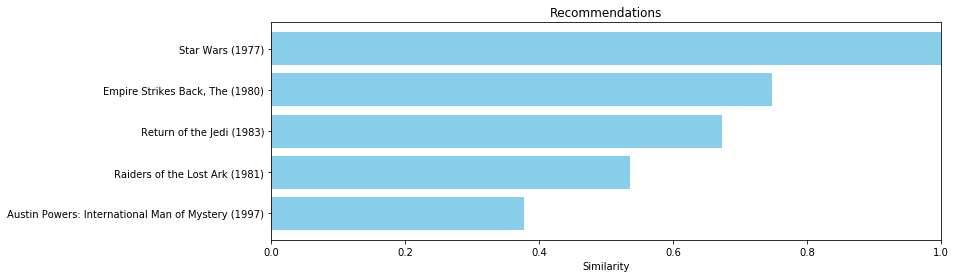

In [161]:
plt.figure(figsize=(12,4))

plt.barh(similar['Title'], similar['Correlation'], align='center', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Similarity")
plt.title("Recommendations")
plt.xlim([0,1])